<a href="https://colab.research.google.com/github/LightningNemesis/knowledge-extraction-NLP/blob/main/Knowledge_extraction_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). Founded in 2008, the team plays its home matches at the M. A. Chidambaram Stadium in Chennai. The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). They hold the records of most appearances in the playoffs (ten) and the Final (eight) of the IPL. In addition, they have also won the Champions League Twenty20 in 2010 and 2014. The brand value of the Super Kings in 2019 is estimated to be around ₹732 crore (roughly $104 million), making them the second-most valuable IPL franchise, after the Mumbai Indians."

Enter the paragraph:
The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). Founded in 2008, the team plays its home matches at the M. A. Chidambaram Stadium in Chennai. The team served a two-year suspension from the IPL starting July 2015 for the alleged involvement of their owners in the 2013 IPL betting case, and won the title in its comeback season. The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. The Super Kings have lifted the IPL title thrice (in 2010, 2011 and 2018), and have the highest win percentage of matches among all teams in the IPL (59.83 %). They hold the records of most appearances in the playoffs (ten) and the Final (eight) of the IPL. In addition, they have also won the Champions League Twenty20 in 2010 and 2014. The brand value of the Super Kings in 2019 is estimated to be around ₹732 crore (roughly $104 million), making them the second-most valuable IPL f

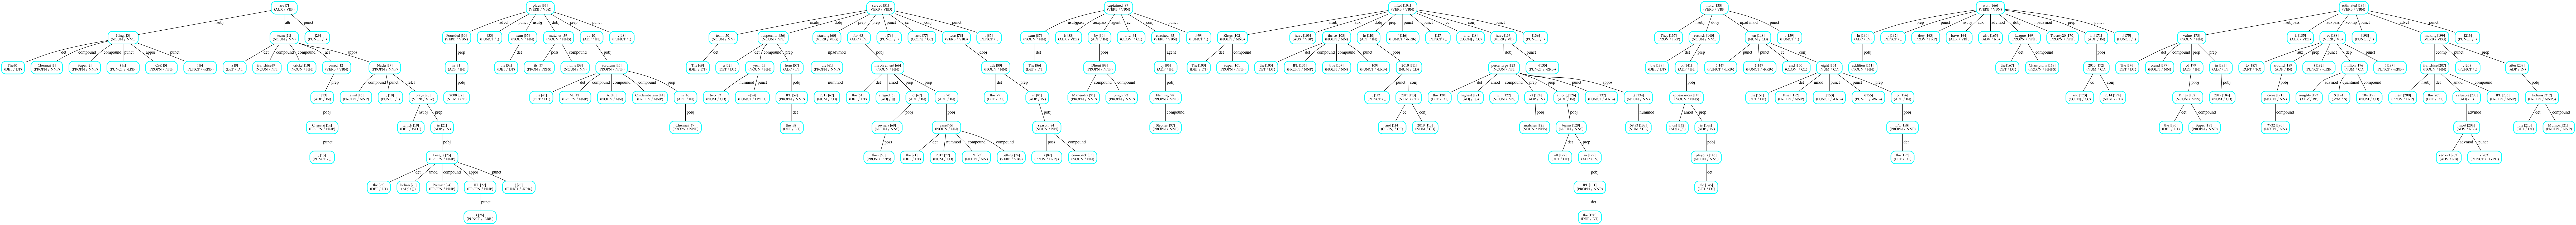


Ask your question...

Who is the captain of CSK?

The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). The team is captained by Mahendra Singh Dhoni and coached by Stephen Fleming. 


Ask your question...

What is winning percentage of CSK?

The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). 


Ask your question...

How many times CSK played finals?

The Chennai Super Kings (CSK) are a franchise cricket team based in Chennai, Tamil Nadu, which plays in the Indian Premier League (IPL). They hold the records of most appearances in the playoffs (ten) and the Final (eight) of the IPL. 


Ask your question...

Q


In [ ]:
from spacy import displacy
from spacy.matcher import Matcher
from nltk import tokenize
import tqdm as tqdm
import math
import numpy as np
import pandas as pd
import spacy
import re
import string
import nltk
import visualise_spacy_tree
from IPython.display import Image, display


pd.set_option('display.max_colwidth', 200)
nlp = spacy.load("en_core_web_sm")


def subtree_matcher(doc):
    subjpass = 0

    for i, tok in enumerate(doc):
        # find dependency tag that contains the text "subjpass"
        if tok.dep_.find("subjpass") == True:
            subjpass = 1

    x = ''
    y = ''

    # if subjpass == 1 then sentence is passive
    if subjpass == 1:
        for i, tok in enumerate(doc):
            if tok.dep_.find("subjpass") == True:
                y = tok.lemma_

            if tok.dep_.endswith("obj") == True:
                x = tok.lemma_

    # if subjpass == 0 then sentence is not passive
    else:
        for i, tok in enumerate(doc):
            if tok.dep_.endswith("subj") == True:
                x = tok.lemma_

            if tok.dep_.endswith("obj") == True:
                y = tok.lemma_

    return x, y


if __name__ == '__main__':
    para = input('Enter the paragraph:\n')
    para_doc = nlp(para)
    print('\nGenerating Knowledge Graph for the paragraph entered...\n')
    png = visualise_spacy_tree.create_png(para_doc)
    with open('parse_tree.png', 'wb') as f:
        f.write(png)
        display(Image(png))

    while True:
        ques = input('\nAsk your question...\n\n')
        if(ques == 'Q'):
            break
        sentence_list = tokenize.sent_tokenize(para)

        doc = nlp(ques)

        terms = subtree_matcher(doc)

        sentences_found = []

        print()
        for i in sentence_list:
            if(re.search(terms[1], i, re.IGNORECASE) or re.search(terms[0], i, re.IGNORECASE)):
                sentences_found.append(i)

        for i in sentences_found:
            print(i, end=" ")
        print('\n')
